In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Introduction to Neural Networks with Python - Part 2

## Review from Part 1

### 1. Artificial Neural Networks

An artificial neural network, or ANN, is __composed of a set of neurons, or perceptrons__, that are connected in a __hierarchical order__. 

An example of 3-layered ANN.
![ANN](figs/ann.png)

### 2. Perceptrons

A perceptron is a node that accepts a __fixed arbitrary number of inputs__, and gives a __single output__.

![Perceptron](figs/perceptron.png)

$ output = \alpha(w \cdot x + b) $, where $ \alpha $ refers to the __activation function__

### 3. Activation (aka Transfer) Functions 

An activation function yields the numerical output of a perceptron. 

* __Binary classification__: Used to decide whether a neuron will fire or not (step function is sufficient).
* __Multiclass classification__: Used to associate probabilities on each classes.

Example presented was __sigmoid function__.

![Sigmoid function](figs/sigmoid_eq.png)
![Sigmoid graph](figs/sigmoid_plot.png)

### 4. Cost (aka Objective / Loss) Functions

Measure of our "happiness" with the outcome. We'll want to minimize this cost function.

* __High loss__: Poor classifier
* __Low loss__: Good classifier

Example presented was __Mean Squared Error (MSE)__.

$ C(w, b) = \frac{1}{n} \sum_x (y_p(x) - y_t)^2 $

### 5. Optimization Algorithms

Algorithms that aim to reduce the cost function.

Example presented was __Gradient Descent__.

Given the possible outputs of a cost function of a 2-input perceptron is the graph below.

![Cost graph](figs/cost_graph.png)

![Gradient Descent](figs/grad_descent_eq.png)

$ \eta $ (a hyperparameter) is the learning rate or how large the step of the gradient descent will be.

## Multilayer Perceptron (MLP)

Last meeting, we've played with a perceptron and tackled primary processes done in ANN. Often, we want to make our perceptrons more robust (or complicated) by adding more layers of these perceptrons to accommodate complexities brought by our training data  -- __Multilayer Perceptron__.

>The predictive capability of neural networks comes from the hierarchical or multi-layered structure of the networks. The data structure can pick out (learn to represent) features at different scales or resolutions and combine them into higher-order features. For example from lines, to collections of lines to shapes ([Brownlee, J.](http://machinelearningmastery.com/neural-networks-crash-course/)).

The figure below shows an example of MLP with 6 input neurons, 2 hidden layers (4,3), and 1 output neuron.

<img src="figs/mlp.png" alt="MLP" style="width: 70%;"/>


Parts:
* Input layer: where you encode your input values e.g. image pixel values. Number of input neurons in the input layer is then straightforward -- number of input values.
* Output layer: contains your output neurons. In binary classification, can be designed to either have 1 or 2 neurons. In multiclass classification, the number of output neurons is the number of classes.
* __Hidden layer/s__: neither your input nor output. Designing is not as straightforward -- can be an art.

## Creating a 2-layer Neural Network

Credits for the original code to Stanford [CS231n](http://cs231n.github.io/neural-networks-case-study/) and notebook annotations to ThinkingMachines [Tutorial](https://github.com/thinkingmachines/deeplearningworkshop.git).

### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Initializing the given values

In [3]:
N = 100 # points per class
D = 2 # dimensionality at 2 so we can eyeball it
K = 3 # number of classes

X = np.zeros((N*K, D)) # generate an empty matrix to hold X features
y = np.zeros(N*K, dtype='uint8') # generate an empty vector to hold y labels

### [Quick Note] Dimensions are crucial during computations

We'll be doing a lot of matrix operations on the following steps. With this, it's worthwhile to have a short review on some linear algebra operations.

* __Matrix multiplication__: It's important that the __column__ of the first matrix is of same size with the __row__ or the second matrix. Operation is not commutative, AxB != BxA.

An example matrix multiplication of 1x3 matrix to 3x3 matrix.

<img src="figs/mat_mult.png" alt="Matrix Multiplication" style="width: 50%;"/>

* __Matrix addition__: As long as the matrices are of the __same dimension__. :)

An example matrix addition of two 2x2 matrices.

<img src="figs/mat_add.png" alt="Matrix Addition" style="width: 40%;"/>

### ** Where do these take place in ANN? **

An example illustration

<img src="figs/dim_illus.png" alt="Dimensions in ANN" style="width: 70%;"/>

### [Quick Question] what are the dimensions of X and y?

### Generating spiral dataset

In [4]:
# for 3 classes, evenly generates spiral arms
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

Let's visualize this. Setting S=20 (size of points) so that the color/label differences are more visible.

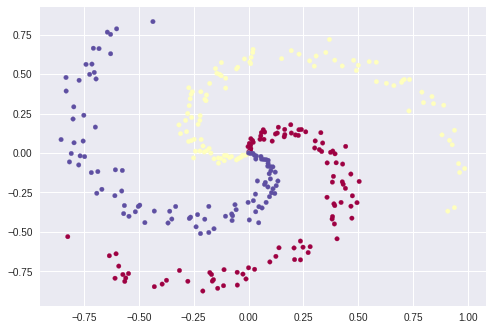

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()

### Training a Linear Classifier

Let's start by training a a simple y = WX + b linear classifer on this dataset. We need to compute some Weights (W) and a bias vector (b) for all classes.

In [6]:
# random initialization of starting parameters
# it's best to randomly initialize at a small value. 
# how many parameters should this linear classifier have? remember there are K output classes, and 2 features per observation.

W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

### [TODO] Print out the shapes and values of W and b

In [7]:
# tip: to get the shape, use [list_var].shape

# print("W: shape: {}, values: {}".format(__fill this__, __fill this__))
# print("b: shape: {}, values: {}".format(__fill this__, __fill this__))

In [8]:
print("W: shape: {}, values: {}".format(W.shape, W))
print("b: shape: {}, values: {}".format(b.shape, b))

W: shape: (2, 3), values: [[-0.00406104  0.0078432   0.01327807]
 [-0.00966932 -0.01799319  0.00835778]]
b: shape: (1, 3), values: [[ 0.  0.  0.]]


In [9]:
# Here are some hyperparameters that we're not going to worry about too much right now

learning_rate = 1e-0 # the step size in the descent
reg = 1e-3

### [TODO] Assign scores to variable 'scores'

In [10]:
# Translate 'scores = W (dot) X + b' to code
# Tip: Check dimensions of variables prior the operations

# scores = 

# Show the scores for the 51th input
# print(scores[50])

In [11]:
scores = np.dot(X, W) + b
print(scores[51])

[ 0.00162726  0.00907764  0.0024305 ]


### [Quick Question] What is the dimension of scores?

### [Quick Question] Aren't the values for the scores a bit hard to interpret? Is there a way to calibrate the scores to somehow fit to probability scores?

### Answer: Softmax classifier

Softmax classifier takes a vector of scores and squashes it between 0 and 1 that sum up to 1. It computes the __probability__ that an input belongs to a class.

<img src="figs/softmax.png" alt="Softmax" style="width: 30%;"/>

where $ s = f(x_i, W) = W \cdot X_i + b $

In [12]:
# Let's try softmax classifier out!

num_examples = X.shape[0]

exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Let's look at one example to verify the softmax transform
print("Scores: {}".format(scores[50])) ## The original scores
print("Class probabilities: {}".format(probs[50])) ## Softmax Transform

Scores: [ 0.00153556  0.00884743  0.00247198]
Class probabilities: [ 0.33241636  0.33485585  0.33272779]


### [Quick Question] Can we then 'derive' our cost function using these probability scores? 
But.. In cost, don't we want a lower value? Probabilities had it in reverse - the higher the value is, the better.

### Answer: Yes, we can. 
We'll just have to add '-log' to our softmax classifier to make it behave like the cost function we've discussed, i.e. lower is better.

<img src="figs/log_cost.png" alt="Log Softmax" style="width: 40%;"/>

### [Quick Question] Why -log??
Math magic: __High__ for probabilities close to 0, __low__ for probabilities close to 1. That's what we want!

<img src="figs/neg_log.png" alt="Negative Log" style="width: 40%;"/>


### [Quick Question] Okay, now that we have our desired loss behavior. Don't we apply it not just for an input, but for the whole (training) set?

### Answer: Yes. The full loss over the training set is shown below.

<img src="figs/full_loss.png" alt="Full Loss" style="width: 40%;"/>


In [13]:
correct_logprobs = -np.log(probs[range(num_examples),y]) 

# data loss is L1 loss plus regularization loss
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [14]:
# this gets the gradient of the scores

# class probabilities minus - divided by num_examples 
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [15]:
# this backpropages the gradient into W and b
dW = np.dot(X.T, dscores) # don't forget to transpose! otherwise, you'll be forwarding the gradient
dW += 0.5*W # regularization gradient

db = np.sum(dscores, axis=0, keepdims=True)

### Updating the Parameters

We update the parameters W and B in the direction of the negative gradient in order to decrease the loss.

In [16]:
# this updates the W and b parameters
W += -learning_rate * dW
b += -learning_rate * db

### Full Code for the Training the Linear Softmax Classifier

Using gradient descent method for optimization.

Using L1 for loss funtion.

This ought to converge to a loss of around 0.78 after 150 iterations


In [17]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]

# evaluated for 200 steps
for i in range(200):
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  
  # for every 10 iterations print the loss
  if i % 10 == 0:
    print("iteration {}: loss {}".format(i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.0980519445090038
iteration 10: loss 0.9030143004327763
iteration 20: loss 0.8301501503214594
iteration 30: loss 0.7965966127477412
iteration 40: loss 0.7788660858913546
iteration 50: loss 0.7686231700041528
iteration 60: loss 0.7623351332391654
iteration 70: loss 0.7583035062255742
iteration 80: loss 0.7556337176416107
iteration 90: loss 0.7538214462254659
iteration 100: loss 0.752567150077852
iteration 110: loss 0.7516854708812194
iteration 120: loss 0.7510578776899355
iteration 130: loss 0.7506065202689272
iteration 140: loss 0.7502791286987339
iteration 150: loss 0.7500399592072827
iteration 160: loss 0.7498641907171362
iteration 170: loss 0.7497343621648752
iteration 180: loss 0.7496380542797924
iteration 190: loss 0.74956635066205


### Evaluating the Training Accuracy

The training accuracy here ought to be at around 0.5

This is better than change for 3 classes, where the expected accuracy of randomly selecting one of out 3 labels is 0.33. But not that much better.

In [18]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: {}'.format(np.mean(predicted_class == y)))

training accuracy: 0.5266666666666666


(-1.8744694029174247, 1.8255305970825786)

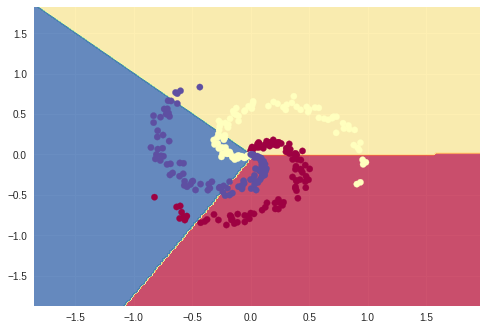

In [19]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Training a 2 Layer Neural Network

Let's see what kind of improvement we'll get with adding a single hidden layer.


In [20]:
# init parameters 
np.random.seed(100) # so we all have the same numbers

h = 100 # size of hidden layer. a hyperparam in itself.

W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))



Let's use a ReLU activation function. See how we're passing the scores from one layer into the hidden layer.

In [21]:
hidden_layer = np.maximum(0, np.dot(X, W) + b) 
scores = np.dot(hidden_layer, W2) + b2

The loss computation and the dscores gradient computation remain the same. The major difference lies in the the chaining backpropagation of the dscores all the way back up to the parameters W and b.

In [22]:
# backpropate the gradient to the parameters of the hidden layer
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

# gradient of the outputs of the hidden layer (the local gradient)
dhidden = np.dot(dscores, W2.T)

# backprop through the ReLU function
dhidden[hidden_layer <= 0] = 0

# back right into the parameters W and b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

### Full Code for Training the 2 Layer NN with ReLU activation

Very similar to the linear classifier!

In [23]:
# initialize parameters randomly

np.random.seed(100) # so we all have the same numbers

h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength


# optimization: gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  # feed forward 
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration {}: loss {}".format(i, loss))
  
  # backprop 
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.0984409850336176
iteration 1000: loss 0.2999436132433993
iteration 2000: loss 0.2693616684546726
iteration 3000: loss 0.2508427901515542
iteration 4000: loss 0.24330225778726083
iteration 5000: loss 0.24133417163995866
iteration 6000: loss 0.24044438953621322
iteration 7000: loss 0.23985867997773386
iteration 8000: loss 0.23960692913797205
iteration 9000: loss 0.2394809765236838


### Evaluating the Training Set Accuracy

This should be around 0.98, which is hugely better than the 0.50 we were getting from the linear classifier!

In [24]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2

predicted_class = np.argmax(scores, axis=1)
print('training accuracy: {}'.format(np.mean(predicted_class == y)))

training accuracy: 0.99


Let's visualize this to get a more dramatic sense of just how good the split is.

(-1.8744694029174247, 1.8255305970825786)

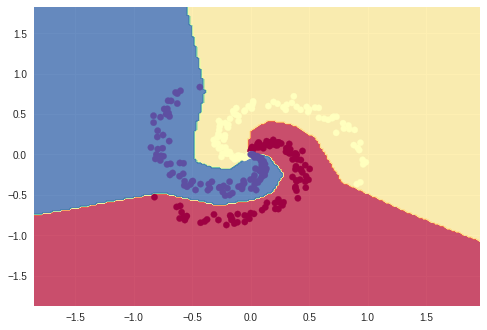

In [25]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

Now Try:

* Generating another couple of arms in the dataset by modifying K and testing the classifiers on the new dataset
* Change the hyperparameters, see how many iterations it takes to for the classifier to roughly converge.
* Change the learning rate to a really high number, observe the iterations to convergence.
* Change the activation function, loss scoring, or optimization method
* Add a 3rd hidden layer